# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression


# Read Data and Data Description

In [2]:
data = pd.read_csv("total_data.csv")

In [3]:
data.head()

,Date,retailer,Retailer Name,Street Addr Address,Street Addr City,Street Addr County,Street Addr State,Street Addr Zip,Business Type,Total Instant Sales,...,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,APLY Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
0,2018-05-13,100048,Spartan Spot Food Store,7558 Asheville Hwy,Spartanburg,SPARTANBURG,SC,29303,Grocery / Food Store,1200,...,0,48,0,0,0,0,0,0,0,0
1,2018-05-13,100091,Jacks Convenience Store of Lancaster Inc,2190 Pageland Hwy,Lancaster,LANCASTER,SC,29720,Grocery / Food Store,0,...,0,58,0,0,0,2,0,0,0,0
2,2018-05-13,100093,Eagle Express,1600 Airport Blvd,West Columbia,LEXINGTON,SC,29169,C-Store w/Gas,0,...,1,33,0,0,0,0,0,0,0,0
3,2018-05-13,100095,Oasis One Stop,1950 N Main St.,SUMMERVILLE,BERKELEY,SC,29486,Grocery / Food Store,600,...,0,12,0,0,2,1,0,0,0,0
4,2018-05-13,100097,Jims Variety Inc,719 E McGregor St,Pageland,CHESTERFIELD,SC,29728,None,1200,...,0,27,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,retailer,Street Addr Zip,Total Instant Sales,Total Online Sales,Total Instant Cashes,Total Online Cashes,P3 Sales,P4 Sales,Powerball Sales,PC5 Sales,...,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,APLY Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
count,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,...,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2333437.0,2.333437e+06,2.333437e+06,2.333437e+06
mean,2.329492e+05,2.946364e+04,1.058989e+03,3.807565e+02,7.292654e+02,1.144298e+02,1.646935e+02,7.953075e+01,6.115884e+01,1.761292e+01,...,2.343986e+00,4.645935e+01,5.441304e-01,9.300315e-02,7.510209e-01,9.047491e-01,0.0,6.254954e-01,4.582652e-01,1.804206e-04
std,4.242310e+04,2.440210e+02,1.093131e+03,4.288924e+02,7.411388e+02,3.327392e+02,2.299911e+02,1.101214e+02,1.094162e+02,2.586527e+01,...,3.782198e+00,3.829956e+01,1.340072e+00,4.178444e-01,1.368476e+00,1.717499e+00,0.0,1.665024e+00,1.048709e+00,1.343086e-02
min,1.000290e+05,2.900100e+04,-9.450000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.394760e+05,2.922300e+04,3.000000e+02,1.255000e+02,2.680000e+02,3.000000e+00,3.050000e+01,1.300000e+01,9.000000e+00,3.000000e+00,...,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.507310e+05,2.950100e+04,9.000000e+02,2.565000e+02,5.210000e+02,1.700000e+01,8.600000e+01,4.100000e+01,2.900000e+01,1.000000e+01,...,1.000000e+00,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.525190e+05,2.964600e+04,1.500000e+03,4.845000e+02,9.400000e+02,8.000000e+01,2.065000e+02,1.020000e+02,7.300000e+01,2.300000e+01,...,3.000000e+00,6.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00
max,2.542400e+05,2.994500e+04,3.855000e+04,2.122450e+04,2.406700e+04,3.750200e+04,6.379500e+03,3.615000e+03,1.169300e+04,3.107000e+03,...,4.210000e+02,8.960000e+02,9.000000e+01,1.010000e+02,1.160000e+02,4.440000e+02,0.0,2.140000e+02,9.100000e+01,1.000000e+00


In [5]:
data.fraud.value_counts(1)

0    0.99982
1    0.00018
Name: fraud, dtype: float64

# Drop text columns and all zeros columns

In [6]:
data = data.drop(['Date','Retailer Name', 'Street Addr Address', 'Street Addr City',
                   'Street Addr County', 'Street Addr State','APLY Cashes Count','APLY Cashes','APLY Sales Count','APLY Sales'],
                 axis = 1)

In [7]:
data.head()

,retailer,Street Addr Zip,Business Type,Total Instant Sales,Total Online Sales,Total Instant Cashes,Total Online Cashes,P3 Sales,P4 Sales,Powerball Sales,...,MegaM Sales Count,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
0,100048,29303,Grocery / Food Store,1200,7.0,803,0,4.0,1.0,0,...,0,0,48,0,0,0,0,0,0,0
1,100091,29720,Grocery / Food Store,0,34.0,694,20,10.0,3.0,8,...,1,0,58,0,0,0,2,0,0,0
2,100093,29169,C-Store w/Gas,0,214.5,465,0,157.0,37.5,6,...,1,1,33,0,0,0,0,0,0,0
3,100095,29486,Grocery / Food Store,600,49.0,93,18,21.0,14.0,8,...,0,0,12,0,0,2,1,0,0,0
4,100097,29728,None,1200,53.0,244,0,37.0,16.0,0,...,0,0,27,0,0,0,0,0,0,0


# Experiment 2 - Data Update: using data from suspected Retailers involved in illicit activities

In [8]:
retailer_fraud = data.groupby("retailer").agg({'fraud':['count','sum']})
retailer_fraud = retailer_fraud.reset_index()
retailer_fraud.columns= ['Retailer','Count','NoOfFraud']

In [9]:
retailer_fraud[(retailer_fraud['NoOfFraud'] >=1)]

,Retailer,Count,NoOfFraud
51,100443,634,1
52,100444,631,2
76,100475,633,1
77,100476,633,1
131,100827,633,2
134,100831,633,1
156,100957,628,7
174,100979,633,3
204,101019,633,1
235,101229,632,2


In [10]:
retailer_fraud.sort_values(by= "NoOfFraud", ascending = False)

,Retailer,Count,NoOfFraud
1172,246664,625,65
2969,252325,631,29
1967,250605,629,27
3861,253567,275,22
3527,253145,632,21
3125,252605,629,17
2471,251574,635,15
3347,252911,633,15
4100,253817,323,11
2118,250838,633,11


In [11]:
data.retailer.nunique()

4495

In [12]:
data_copy = data.copy()
fraud = data_copy[data_copy.fraud==1]
fraud = fraud[['retailer']]
data_trial = data_copy[data_copy.retailer.isin(fraud['retailer'])]
data_trial.fraud.value_counts()

0    47870
1      421
Name: fraud, dtype: int64

In [13]:
data.fraud.value_counts(1)

0    0.99982
1    0.00018
Name: fraud, dtype: float64

In [14]:
len(data_trial)

48291

In [15]:
data_trial['Business Type'].value_counts()

C-Store w/Gas           35565
Convenience Store       10730
Grocery / Food Store     1450
Liquor (ABC)              546
Name: Business Type, dtype: int64

In [16]:
data_trial.columns

Index(['retailer', 'Street Addr Zip', 'Business Type', 'Total Instant Sales',
       'Total Online Sales', 'Total Instant Cashes', 'Total Online Cashes',
       'P3 Sales', 'P4 Sales', 'Powerball Sales', 'PC5 Sales',
       'Mega Millions Sales', 'LFL Sales', 'P3 Cashes', 'P4 Cashes',
       'Powerball Cashes', 'PC5 Cashes', 'Mega Millions Cashes', 'LFL Cashes',
       'P3 Sales Count', 'P3 Sales Cancel', 'P4 Sales Count',
       'P4 Sales Cancel', 'Powerball Sales Count', 'PC5 Sales Count',
       'MegaM Sales Count', 'LFL Sales Count', 'Instant Cashes Count',
       'P3 Cashes Count', 'P4 Cashes Count', 'Powerball Cashes Count',
       'PC5 Cashes Count', 'MegaM Cashes Count', 'LFL Cashes Count', 'fraud'],
      dtype='object')

# Building new features

In [17]:
#Feature1
data_trial['Validation_Ratio'] = data_trial['Total Instant Cashes'] / data_trial['Instant Cashes Count'] 

In [18]:
print(data_trial.Validation_Ratio.max())
print(data_trial.Validation_Ratio.min())

500.0
1.0


In [19]:
# count null values
data_trial[data_trial['Validation_Ratio'].isna()]['fraud'].value_counts()

0    34
Name: fraud, dtype: int64

In [20]:
# Imputing null values with mean
data_trial.Validation_Ratio.fillna(data_trial.Validation_Ratio.mean(), inplace=True)

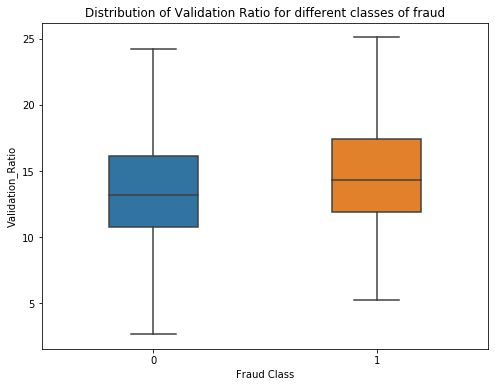

In [21]:
# Box plot to check spread of values amongst the two classes
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(x=data_trial['fraud'], y=data_trial['Validation_Ratio'],width=0.4,showfliers=False)
ax.set_xlabel("Fraud Class")
ax.set_ylabel("Validation_Ratio")
ax.set_title("Distribution of Validation Ratio for different classes of fraud");

In [22]:
#Feature 2 
data_trial['ValidationToSale_Ratio'] = data_trial['Total Instant Cashes'] / data_trial['Total Instant Sales'] 

In [23]:
#counting values that are infinite because of division by zero in some cases
data_trial[data_trial['ValidationToSale_Ratio'] == np.inf]['fraud'].value_counts()

0    6167
1      32
Name: fraud, dtype: int64

In [24]:
# counting null values
data_trial[data_trial['ValidationToSale_Ratio'].isna()]['fraud'].value_counts()

0    31
Name: fraud, dtype: int64

In [25]:
data_trial = data_trial[-data_trial['ValidationToSale_Ratio'].isna()]

In [26]:
# imputing infinite with null
data_trial = data_trial.replace(np.inf, np.nan)

In [27]:
# imputing null with mean
data_trial.ValidationToSale_Ratio.fillna(data_trial.ValidationToSale_Ratio.mean(), inplace=True)

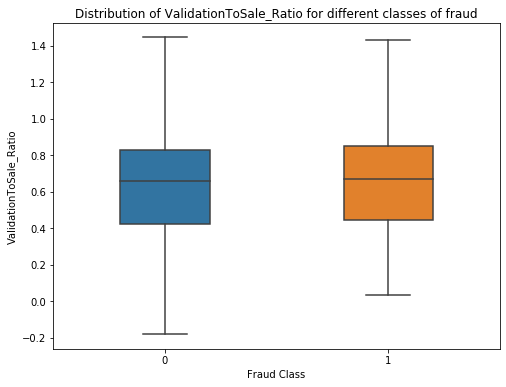

In [28]:
# Box plot to check spread of values amongst the two classes
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(x=data_trial['fraud'], y=data_trial['ValidationToSale_Ratio'],width=0.4,showfliers=False)
ax.set_xlabel("Fraud Class")
ax.set_ylabel("ValidationToSale_Ratio")
ax.set_title("Distribution of ValidationToSale_Ratio for different classes of fraud");

In [29]:
data_trial['Business Type'].value_counts()

C-Store w/Gas           35560
Convenience Store       10727
Grocery / Food Store     1433
Liquor (ABC)              540
Name: Business Type, dtype: int64

# Converting categorical column to Numerical

In [30]:
unique_bussines = data_trial['Business Type'].unique()
cat_features = ['Business Type']
print(data_trial.shape)
data_trial = pd.get_dummies(data_trial,columns=cat_features)
print(data_trial.shape)

(48260, 37)
(48260, 40)


# Train-test split

In [31]:
#Train -Test split (80-20)
train, test= train_test_split(data_trial,train_size = 0.8,random_state=123)
print(train.shape)
print(test.shape)
print(train.fraud.value_counts(1))
print(test.fraud.value_counts(1))

(38608, 40)
(9652, 40)
0    0.991634
1    0.008366
Name: fraud, dtype: float64
0    0.989847
1    0.010153
Name: fraud, dtype: float64


In [32]:
train_Y = train['fraud']
train_X = train.drop('fraud', axis = 1)

test_Y = test['fraud']
test_X = test.drop('fraud', axis = 1)

# GBM

In [33]:
# Modelling Experiments

#Experiment 1
model1 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,random_state=11)
model1.fit(train_X, train_Y)

train_predicted = model1.predict(train_X)
test_predicted = model1.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))

Train Results:
0.9920741815167841
[[38285     0]
 [  306    17]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38285
           1       1.00      0.05      0.10       323

    accuracy                           0.99     38608
   macro avg       1.00      0.53      0.55     38608
weighted avg       0.99      0.99      0.99     38608


Test Results:
0.9898466639038541
[[9553    1]
 [  97    1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.50      0.01      0.02        98

    accuracy                           0.99      9652
   macro avg       0.74      0.51      0.51      9652
weighted avg       0.98      0.99      0.98      9652



In [34]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':model1.predict(test_X),'Predicted_prob_class1':model1.predict_proba(test_X)[:,1]})

# Threshold Analysis for class 'fraud'

In [35]:
actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn

,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,29,4,0.137931,0.040816
2,0.2,8,2,0.250000,0.020408
3,0.3,5,2,0.400000,0.020408
4,0.4,3,1,0.333333,0.010204
5,0.5,2,1,0.500000,0.010204
6,0.6,1,0,0.000000,0.000000
7,0.7,1,0,0.000000,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


# Feature Importances

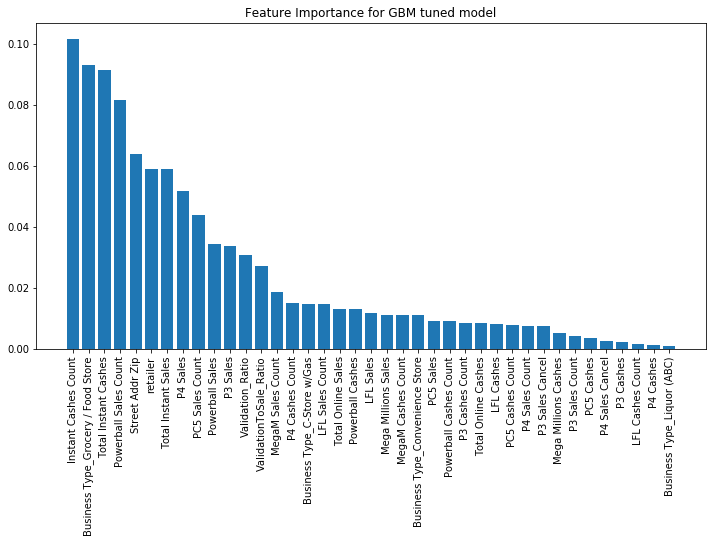

In [36]:
plt.figure(figsize=(12,6))

importances = model1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_X.columns[i] for i in indices]

# Create plot title
plt.title("Feature Importance for GBM tuned model")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90);


In [37]:
train_Y.value_counts()

0    38285
1      323
Name: fraud, dtype: int64

# Imbalanced Data Technique - Undersampling

In [38]:
#Random Undersampling==============================================================================
from imblearn.under_sampling import (RandomUnderSampler)

# RandomUnderSampler
sampler = RandomUnderSampler(0.1,random_state=11)
train_X, train_Y = sampler.fit_resample(train_X, train_Y)
print('Random undersampling {}'.format(Counter(train_Y)))

Using TensorFlow backend.


Random undersampling Counter({0: 3230, 1: 323})


In [39]:
323/(3230+323)

0.09090909090909091

# GBM Undersampling

In [40]:
# Modelling Experiments

#Experiment 1
model2 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,random_state=11)
model2.fit(train_X, train_Y)

train_predicted = model2.predict(train_X)
test_predicted = model2.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))

Train Results:
0.9256965944272446
[[3227    3]
 [ 261   62]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3230
           1       0.95      0.19      0.32       323

    accuracy                           0.93      3553
   macro avg       0.94      0.60      0.64      3553
weighted avg       0.93      0.93      0.90      3553


Test Results:
0.9857024450891007
[[9504   50]
 [  88   10]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9554
           1       0.17      0.10      0.13        98

    accuracy                           0.99      9652
   macro avg       0.58      0.55      0.56      9652
weighted avg       0.98      0.99      0.98      9652



In [42]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':model2.predict(test_X),'Predicted_prob_class1':model2.predict_proba(test_X)[:,1]})

In [43]:
#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn

,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,2287,64,0.027984,0.653061
2,0.2,554,35,0.063177,0.357143
3,0.3,207,22,0.106280,0.224490
4,0.4,93,11,0.118280,0.112245
5,0.5,60,10,0.166667,0.102041
6,0.6,39,7,0.179487,0.071429
7,0.7,25,3,0.120000,0.030612
8,0.8,6,1,0.166667,0.010204
9,0.9,1,0,0.000000,0.000000


# Neural Network

In [44]:
#neural network classification base model
nn = MLPClassifier()

#fit data
nn.fit(train_X, train_Y) 

#predict test
train_predicted = nn.predict(train_X)
test_predicted = nn.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9090909090909091
[[3230    0]
 [ 323    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3230
           1       0.00      0.00      0.00       323

    accuracy                           0.91      3553
   macro avg       0.45      0.50      0.48      3553
weighted avg       0.83      0.91      0.87      3553


Test Results:
0.9898466639038541
[[9554    0]
 [  98    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.00      0.00      0.00        98

    accuracy                           0.99      9652
   macro avg       0.49      0.50      0.50      9652
weighted avg       0.98      0.99      0.98      9652



In [45]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':nn.predict(test_X),'Predicted_prob_class1':nn.predict_proba(test_X)[:,1]})

In [46]:
#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn

,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.0
1,0.1,0,0,NaN,0.0
2,0.2,0,0,NaN,0.0
3,0.3,0,0,NaN,0.0
4,0.4,0,0,NaN,0.0
5,0.5,0,0,NaN,0.0
6,0.6,0,0,NaN,0.0
7,0.7,0,0,NaN,0.0
8,0.8,0,0,NaN,0.0
9,0.9,0,0,NaN,0.0


In [48]:
#Classifying transactions into different risk levels of being fradualent

thresh_red = 0.3
thresh_yellow = 0.1

def classify_transaction(x):
    if x >= thresh_red:
        return "Red"
    elif x >= thresh_yellow:
        return "Yellow"
    else:
        return "Green"

In [49]:
test_actual_predicted['RiskClass'] = test_actual_predicted['Predicted_prob_class1'].apply(classify_transaction)

In [50]:
test_actual_predicted.RiskClass.value_counts()

Green    9652
Name: RiskClass, dtype: int64

In [51]:
test_actual_predicted.RiskClass.value_counts(1)

Green    1.0
Name: RiskClass, dtype: float64

In [52]:
# Cross table for Actual Fraud information against predicted risk level
pd.crosstab(index=test_actual_predicted["Actual"], columns=test_actual_predicted["RiskClass"])

RiskClass,Green
Actual,
0,9554
1,98


# Logistic

In [53]:
# Logistic 

LRClassifier = LogisticRegression(random_state=11, solver='lbfgs', C=10, max_iter=5000)
#fit data
LRClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = LRClassifier.predict(train_X)
test_predicted = LRClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9088094567970729
[[3226    4]
 [ 320    3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3230
           1       0.43      0.01      0.02       323

    accuracy                           0.91      3553
   macro avg       0.67      0.50      0.49      3553
weighted avg       0.87      0.91      0.87      3553


Test Results:
0.9890178201409034
[[9546    8]
 [  98    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.00      0.00      0.00        98

    accuracy                           0.99      9652
   macro avg       0.49      0.50      0.50      9652
weighted avg       0.98      0.99      0.98      9652



In [54]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':LRClassifier.predict(test_X),'Predicted_prob_class1':LRClassifier.predict_proba(test_X)[:,1]})

In [55]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':LRClassifier.predict(test_X),
                                      'Predicted_prob_class1':LRClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,3126,48,0.015355,0.489796
2,0.2,142,0,0.000000,0.000000
3,0.3,61,0,0.000000,0.000000
4,0.4,26,0,0.000000,0.000000
5,0.5,8,0,0.000000,0.000000
6,0.6,2,0,0.000000,0.000000
7,0.7,0,0,NaN,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


# K Neighbour Classifier

In [56]:
# K neighbour

from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=15)
KNNClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = KNNClassifier.predict(train_X)
test_predicted = KNNClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9130312412046158
[[3216   14]
 [ 295   28]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      3230
           1       0.67      0.09      0.15       323

    accuracy                           0.91      3553
   macro avg       0.79      0.54      0.55      3553
weighted avg       0.89      0.91      0.88      3553


Test Results:
0.9852880232076253
[[9509   45]
 [  97    1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.02      0.01      0.01        98

    accuracy                           0.99      9652
   macro avg       0.51      0.50      0.50      9652
weighted avg       0.98      0.99      0.98      9652



In [57]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':KNNClassifier.predict(test_X),'Predicted_prob_class1':KNNClassifier.predict_proba(test_X)[:,1]})

In [58]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':KNNClassifier.predict(test_X),
                                      'Predicted_prob_class1':KNNClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,2667,73,0.027372,0.744898
2,0.2,1421,57,0.040113,0.581633
3,0.3,352,20,0.056818,0.204082
4,0.4,192,13,0.067708,0.132653
5,0.5,46,1,0.021739,0.010204
6,0.6,17,1,0.058824,0.010204
7,0.7,1,0,0.000000,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


# Random Forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier

RFClassifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=11)
RFClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = RFClassifier.predict(train_X)
test_predicted = RFClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9197860962566845
[[3230    0]
 [ 285   38]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3230
           1       1.00      0.12      0.21       323

    accuracy                           0.92      3553
   macro avg       0.96      0.56      0.58      3553
weighted avg       0.93      0.92      0.89      3553


Test Results:
0.987981765437215
[[9534   20]
 [  96    2]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.09      0.02      0.03        98

    accuracy                           0.99      9652
   macro avg       0.54      0.51      0.51      9652
weighted avg       0.98      0.99      0.98      9652



In [60]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':RFClassifier.predict(test_X),'Predicted_prob_class1':RFClassifier.predict_proba(test_X)[:,1]})

In [61]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':RFClassifier.predict(test_X),
                                      'Predicted_prob_class1':RFClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,2540,64,0.025197,0.653061
2,0.2,203,19,0.093596,0.193878
3,0.3,103,15,0.145631,0.153061
4,0.4,60,8,0.133333,0.081633
5,0.5,22,2,0.090909,0.020408
6,0.6,7,1,0.142857,0.010204
7,0.7,0,0,NaN,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


# SVM

In [62]:
from sklearn.svm import SVC

SVMClassifier = SVC(C=10, kernel='linear', random_state=11,probability=True)

SVMClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = SVMClassifier.predict(train_X)
test_predicted = SVMClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))

Train Results:
0.9079650999155643
[[3222    8]
 [ 319    4]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3230
           1       0.33      0.01      0.02       323

    accuracy                           0.91      3553
   macro avg       0.62      0.50      0.49      3553
weighted avg       0.86      0.91      0.87      3553


Test Results:
0.9878781599668462
[[9535   19]
 [  98    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9554
           1       0.00      0.00      0.00        98

    accuracy                           0.99      9652
   macro avg       0.49      0.50      0.50      9652
weighted avg       0.98      0.99      0.98      9652



In [63]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':SVMClassifier.predict(test_X),'Predicted_prob_class1':SVMClassifier.predict_proba(test_X)[:,1]})

In [64]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':SVMClassifier.predict(test_X),
                                      'Predicted_prob_class1':SVMClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,9652,98,0.010153,1.000000
1,0.1,1506,19,0.012616,0.193878
2,0.2,16,0,0.000000,0.000000
3,0.3,3,0,0.000000,0.000000
4,0.4,0,0,NaN,0.000000
5,0.5,0,0,NaN,0.000000
6,0.6,0,0,NaN,0.000000
7,0.7,0,0,NaN,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000
